In [1]:
#  Deportista 1 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ruta de tu archivo
ruta = r"C:\Users\USUARIO\OneDrive\Desktop\Proyecto Biomecánica\Deportista1.xlsx"

# Leer el archivo completo
df = pd.read_excel(ruta, header=None)

# Función para extraer un bloque
def extraer_bloque(df, col_t, col_x, col_y, nombre):
    bloque = df[[col_t, col_x, col_y]].copy()
    bloque.columns = ["Tiempo", "X", "Y"]
    # Eliminar filas que no contienen números
    bloque = bloque[pd.to_numeric(bloque["Tiempo"], errors="coerce").notna()]
    bloque["Tiempo"] = bloque["Tiempo"].astype(float)
    bloque["X"] = bloque["X"].astype(float)
    bloque["Y"] = bloque["Y"].astype(float)
    print(f"\nPreview de {nombre}:")
    display(bloque.head())
    return bloque

# Extraer cada segmento
pie = extraer_bloque(df, 0, 1, 2, "Pie")
muslo = extraer_bloque(df, 4, 5, 6, "Muslo;")
pantorrilla = extraer_bloque(df, 8, 9, 10, "Pantorrilla")
cadera = extraer_bloque(df, 12, 13, 14, "Cadera")
sacro = extraer_bloque(df, 16, 17, 18, "Sacro")
tobillo = extraer_bloque(df, 20, 21, 22, "Tobillo")
rodilla = extraer_bloque(df, 24, 25, 26, "Rodilla")




Preview de Pie:


,Tiempo,X,Y
4,0.000000,-18.242823,-6.319687
5,33.366665,-18.242622,-6.320030
6,66.733330,-18.242300,-6.320778
7,100.099998,-18.242279,-6.321754
8,133.466660,-18.242676,-6.322708



Preview de Muslo;:


,Tiempo,X,Y
4,0.000000,-16.421310,26.865200
5,33.366665,-16.420292,27.297939
6,66.733330,-16.528448,27.947639
7,100.099998,-16.638714,29.030254
8,133.466660,-16.854399,30.331295



Preview de Pantorrilla:


,Tiempo,X,Y
4,0.000000,-13.329250,9.668434
5,33.366665,-13.545914,9.670105
6,66.733330,-13.762888,9.888206
7,100.099998,-14.196599,10.106247
8,133.466660,-14.738512,10.538719



Preview de Cadera:


,Tiempo,X,Y
4,0.000000,-26.587311,33.751461
5,33.366665,-26.586531,34.402092
6,66.733330,-26.586319,35.268845
7,100.099998,-26.586081,36.568562
8,133.466660,-26.477646,38.085365



Preview de Sacro:


,Tiempo,X,Y
4,0.000000,-37.827927,35.435688
5,33.366665,-37.827129,36.086029
6,66.733330,-37.718842,37.169563
7,100.099998,-37.718166,38.903526
8,133.466660,-37.500801,41.070610



Preview de Tobillo:


,Tiempo,X,Y
4,0.000000,-29.339157,2.730515
5,33.366665,-29.338615,2.838066
6,66.733330,-29.338179,2.838135
7,100.099998,-29.447147,2.730576
8,133.466660,-29.771889,2.729866



Preview de Rodilla:


,Tiempo,X,Y
4,0.000000,0.993677,18.797325
5,33.366665,0.994068,19.013485
6,66.733330,1.210857,19.338631
7,100.099998,0.994332,19.772114
8,133.466660,0.556758,19.959629


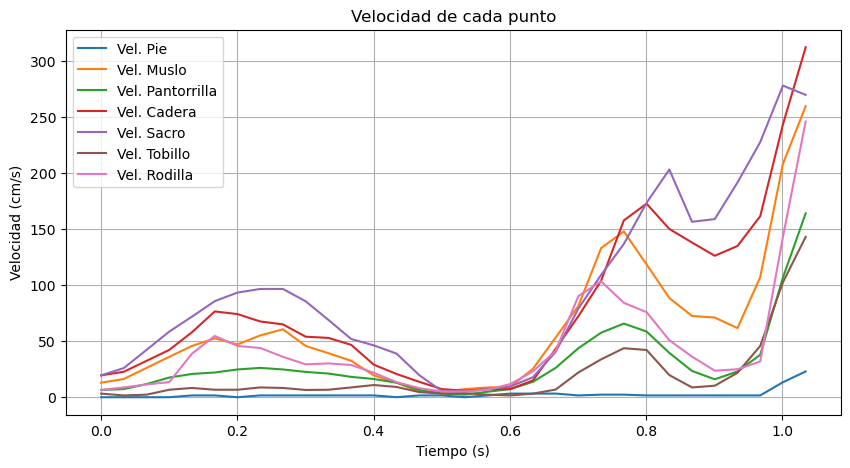

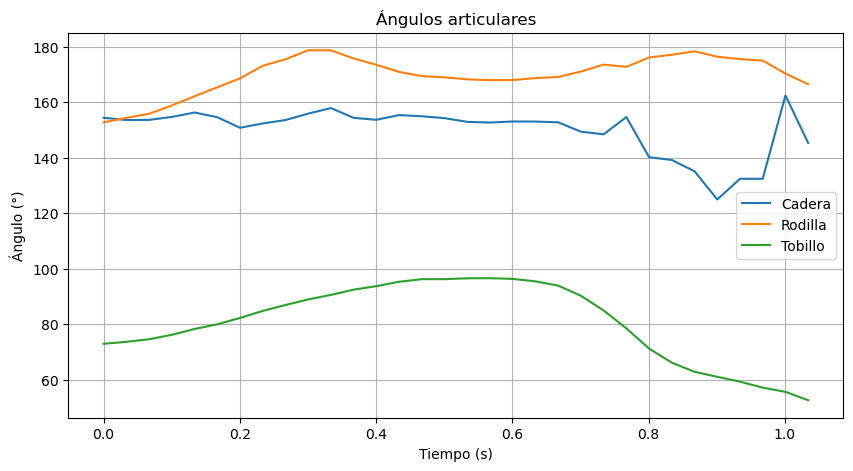


==== Pie ====
Velocidad total MAX: 22.973 cm/s
Velocidad total MIN: 0.012 cm/s
Velocidad en X MAX: 22.743 cm/s
Velocidad en X MIN: -3.248 cm/s
Velocidad en Y MAX: 0.047 cm/s
Velocidad en Y MIN: -3.244 cm/s

==== Muslo ====
Velocidad total MAX: 259.519 cm/s
Velocidad total MIN: 4.602 cm/s
Velocidad en X MAX: 256.592 cm/s
Velocidad en X MIN: -12.233 cm/s
Velocidad en Y MAX: 59.328 cm/s
Velocidad en Y MIN: -44.202 cm/s

==== Pantorrilla ====
Velocidad total MAX: 163.978 cm/s
Velocidad total MIN: 2.309 cm/s
Velocidad en X MAX: 136.442 cm/s
Velocidad en X MIN: -22.727 cm/s
Velocidad en Y MAX: 90.953 cm/s
Velocidad en Y MIN: -16.239 cm/s

==== Cadera ====
Velocidad total MAX: 312.088 cm/s
Velocidad total MIN: 5.807 cm/s
Velocidad en X MAX: 311.817 cm/s
Velocidad en X MIN: 0.007 cm/s
Velocidad en Y MAX: 75.975 cm/s
Velocidad en Y MIN: -27.723 cm/s

==== Sacro ====
Velocidad total MAX: 277.852 cm/s
Velocidad total MIN: 5.057 cm/s
Velocidad en X MAX: 277.851 cm/s
Velocidad en X MIN: 0.024 cm/s

In [2]:
def calcular_velocidad(segmento):
    x = segmento["X"].values
    y = segmento["Y"].values
    t = segmento["Tiempo"].values / 1000  # ms → s
    
    vx = np.gradient(x, t)
    vy = np.gradient(y, t)
    v = np.sqrt(vx**2 + vy**2)
    return vx, vy, v

vel_pie = calcular_velocidad(pie)
vel_muslo = calcular_velocidad(muslo)
vel_pant = calcular_velocidad(pantorrilla)
vel_cad = calcular_velocidad(cadera)
vel_sacro = calcular_velocidad(sacro)
vel_tobi = calcular_velocidad(tobillo)
vel_rodi = calcular_velocidad(rodilla)


def angulo_3p(a, b, c):
    ba = a - b
    bc = c - b
    
    cos_ang = np.sum(ba * bc, axis=1) / (np.linalg.norm(ba, axis=1) * np.linalg.norm(bc, axis=1))
    ang = np.arccos(np.clip(cos_ang, -1, 1))
    return np.degrees(ang)

pie_xy = pie[["X","Y"]].values
pant_xy = pantorrilla[["X","Y"]].values
muslo_xy = muslo[["X","Y"]].values
cadera_xy = cadera[["X","Y"]].values
sacro_xy = sacro[["X","Y"]].values

# Rodilla = Muslo - Rodilla(Pant) - Pie
angulo_rodilla = angulo_3p(muslo_xy, pant_xy, pie_xy)

# Cadera = Sacro - Cadera - Muslo
angulo_cadera = angulo_3p(sacro_xy, cadera_xy, muslo_xy)

# Tobillo = Pantorrilla - Pie - eje horizontal (vector auxiliar)
angulo_tobillo = angulo_3p(pant_xy, pie_xy, pie_xy + np.array([1,0]))

# =========================================
# Gráficas
# =========================================
tiempo_seg = pie["Tiempo"].values / 1000

plt.figure(figsize=(10,5))
plt.plot(tiempo_seg, vel_pie[2], label="Vel. Pie")
plt.plot(tiempo_seg, vel_muslo[2], label="Vel. Muslo")
plt.plot(tiempo_seg, vel_pant[2], label="Vel. Pantorrilla")
plt.plot(tiempo_seg, vel_cad[2], label="Vel. Cadera")
plt.plot(tiempo_seg, vel_sacro[2], label="Vel. Sacro")
plt.plot(tiempo_seg, vel_tobi[2], label="Vel. Tobillo")
plt.plot(tiempo_seg, vel_rodi[2], label="Vel. Rodilla")
plt.legend()
plt.title("Velocidad de cada punto")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad (cm/s)")
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(tiempo_seg, angulo_cadera, label="Cadera")
plt.plot(tiempo_seg, angulo_rodilla, label="Rodilla")
plt.plot(tiempo_seg, angulo_tobillo, label="Tobillo")
plt.legend()
plt.title("Ángulos articulares")
plt.xlabel("Tiempo (s)")
plt.ylabel("Ángulo (°)")
plt.grid()
plt.show()

# =========================================
# Velocidades máximas y mínimas
# =========================================
def resumen_vel(nombre, vel):
    vx, vy, v = vel
    print(f"\n==== {nombre} ====")
    print(f"Velocidad total MAX: {np.max(v):.3f} cm/s")
    print(f"Velocidad total MIN: {np.min(v):.3f} cm/s")
    print(f"Velocidad en X MAX: {np.max(vx):.3f} cm/s")
    print(f"Velocidad en X MIN: {np.min(vx):.3f} cm/s")
    print(f"Velocidad en Y MAX: {np.max(vy):.3f} cm/s")
    print(f"Velocidad en Y MIN: {np.min(vy):.3f} cm/s")

resumen_vel("Pie", vel_pie)
resumen_vel("Muslo", vel_muslo)
resumen_vel("Pantorrilla", vel_pant)
resumen_vel("Cadera", vel_cad)
resumen_vel("Sacro", vel_sacro)
resumen_vel("Tobillo", vel_tobi)
resumen_vel("Rodilla", vel_rodi)

# =========================================
# Ángulos máximos y mínimos
# =========================================
def resumen_ang(nombre, ang):
    print(f"\n==== Ángulo de {nombre} ====")
    print(f"Ángulo MAX: {np.max(ang):.3f} grados")
    print(f"Ángulo MIN: {np.min(ang):.3f} grados")

resumen_ang("Cadera", angulo_cadera)
resumen_ang("Rodilla", angulo_rodilla)
resumen_ang("Tobillo", angulo_tobillo)

